In [45]:
library("ggplot2")
library('interactions')
library('stargazer')
library("latex2exp")

In [2]:
data<-read.csv('zhihu_cateroy_spanning_interaction_2.csv')

In [3]:
head(data)

,X,title_length,log_lasting_days,max_level,content_distance,content_distance2,content_distance_by_max_level,content_distance2_by_max_level,Mon,Tue,⋯,H_12_15,H_15_18,H_18_21,log_follower_num,topic_num,knowledge_granularity,log_content_distance,log_content_distance2,log_content_distance_by_max_level,log_content_distance2_by_max_level
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,13,7.889084,5,0.3053453,0.09323573,1.5267263,0.4661786,0,0,⋯,0,0,0,8.494334,3,5,-0.5137888,0.26397897,1.3198949,1.3198949
2,1,21,7.878913,7,0.5132803,0.26345670,3.5929623,1.8441969,0,0,⋯,1,0,0,8.128880,2,7,-0.2888001,0.08340549,0.5838384,0.5838384
3,2,21,7.866339,6,0.5172706,0.26756884,3.1036234,1.6054130,0,0,⋯,0,0,0,4.927254,2,6,-0.2854435,0.08147797,0.4888678,0.4888678
4,3,15,7.862882,5,0.1460233,0.02132279,0.7301163,0.1066140,0,0,⋯,0,1,0,5.209486,5,5,-0.8326139,0.69324596,3.4662298,3.4662298
5,4,18,7.858641,8,0.0000000,0.00000000,0.0000000,0.0000000,1,0,⋯,0,0,1,5.627621,1,8,-3.0000000,9.00000000,72.0000000,72.0000000
6,5,13,7.852828,7,0.1550947,0.02405435,1.0856626,0.1683805,0,1,⋯,0,0,0,9.427466,5,7,-0.8066120,0.65062285,4.5543599,4.5543599


In [4]:
colnames(data)

[1] "X"                                  "title_length"                      
 [3] "log_lasting_days"                   "max_level"                         
 [5] "content_distance"                   "content_distance2"                 
 [7] "content_distance_by_max_level"      "content_distance2_by_max_level"    
 [9] "Mon"                                "Tue"                               
[11] "Wed"                                "Thu"                               
[13] "Fri"                                "H_0_3"                             
[15] "H_3_6"                              "H_6_9"                             
[17] "H_9_12"                             "H_12_15"                           
[19] "H_15_18"                            "H_18_21"                           
[21] "log_follower_num"                   "topic_num"                         
[23] "knowledge_granularity"              "log_content_distance"              
[25] "log_content_distance2"              "log_content_distance_by_max_level" 
[27] "log_content_distance2_by_max_level"

In [6]:
max(data$topic_num)

[1] 16

In [9]:
quantile(data$topic_num, c(.7, .8, .9, .95, .99))

70% 80% 90% 95% 99% 
  4   5   5   5   5

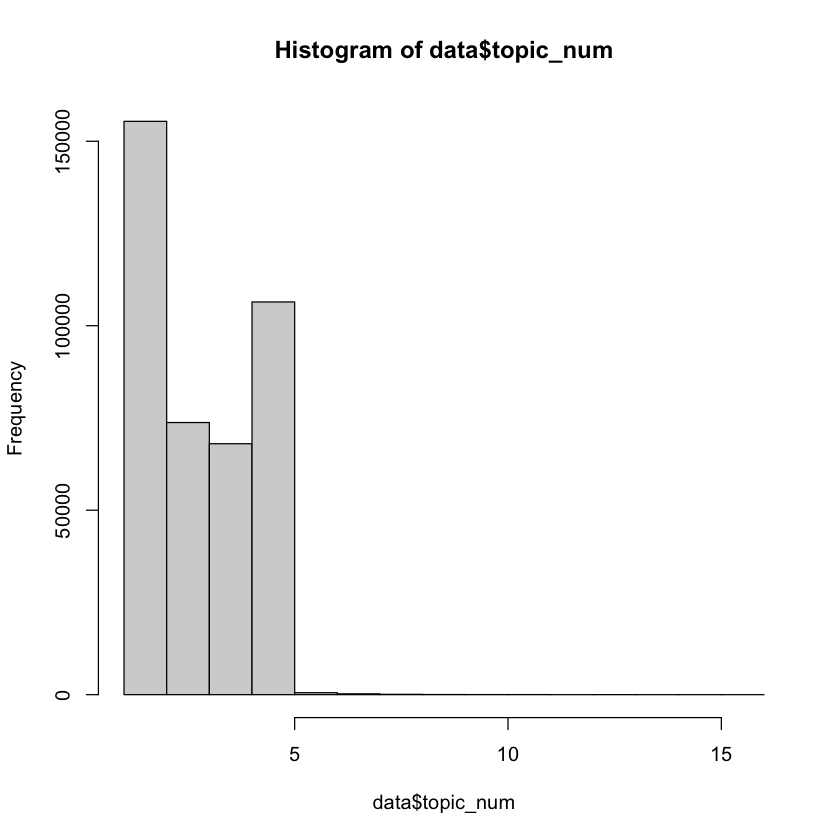

In [5]:
hist(data$topic_num)

In [120]:
model_1 = lm(log_follower_num ~poly(log_content_distance, 2) ,
          data = data)

In [41]:
model_2 = lm(log_follower_num ~
           poly(log_content_distance, 2)+ knowledge_granularity 
             + title_length+log_lasting_days+Mon+Tue+Wed+Thu+Fri,
          data = data)

In [43]:
model_3 = lm(log_follower_num ~
           poly(log_content_distance, 2)*knowledge_granularity
           + title_length+log_lasting_days+Mon+Tue+Wed+Thu+Fri,
          data = data)

In [31]:
model1 = lm(log_follower_num ~
           poly(log_content_distance, 2) + knowledge_granularity
           +title_length+log_lasting_days+
        +Mon+Tue+Wed+Thu+Fri+H_0_3+H_3_6+H_6_9+H_9_12+H_12_15+H_15_18+H_18_21,
          data = data)

In [32]:
model2 = lm(scale(log_follower_num) ~
           poly(scale(log_content_distance), 2) + scale(knowledge_granularity)
           +scale(title_length)+scale(log_lasting_days)+
        +Mon+Tue+Wed+Thu+Fri+H_0_3+H_3_6+H_6_9+H_9_12+H_12_15+H_15_18+H_18_21,
          data = data)

In [9]:
model3 = lm(log_follower_num ~
           poly(log_content_distance, 2)*knowledge_granularity
           +title_length+log_lasting_days+
        +Mon+Tue+Wed+Thu+Fri+H_0_3+H_3_6+H_6_9+H_9_12+H_12_15+H_15_18+H_18_21,
          data = data)

In [30]:
model4 = lm(scale(log_follower_num) ~
           poly(scale(log_content_distance), 2)*scale(knowledge_granularity)
           +scale(title_length)+scale(log_lasting_days)+
        +Mon+Tue+Wed+Thu+Fri+H_0_3+H_3_6+H_6_9+H_9_12+H_12_15+H_15_18+H_18_21,
          data = data)

In [33]:
library("lm.beta")

lm.beta(model3)


Call:
lm(formula = log_follower_num ~ poly(log_content_distance, 2) * 
    knowledge_granularity + title_length + log_lasting_days + 
    +Mon + Tue + Wed + Thu + Fri + H_0_3 + H_3_6 + H_6_9 + H_9_12 + 
    H_12_15 + H_15_18 + H_18_21, data = data)

Standardized Coefficients::
                                         (Intercept) 
                                                  NA 
                      poly(log_content_distance, 2)1 
                                        2.360905e-01 
                      poly(log_content_distance, 2)2 
                                       -2.993078e-02 
                               knowledge_granularity 
                                       -1.271282e-02 
                                        title_length 
                                       -4.911254e-02 
                                    log_lasting_days 
                                        5.519531e-01 
                                                 Mon 
                   

In [85]:
install.packages("simpleboot")


The downloaded binary packages are in
	/var/folders/8b/hhnbt0nd4zsg2qhxc28q23w80000gn/T//RtmpC7gy6f/downloaded_packages


In [107]:
data$log_content_distance2[0:3]

[1] 0.26397897 0.08340549 0.08147797

In [95]:
# lm.boot Linear model bootstrap
library('simpleboot')

model_1 = lm(log_follower_num ~log_content_distance ,
          data = data)

lboot <- lm.boot(model_1, R=10) # 199 bootstrap samples--too small to be useful
summary(lboot)  # default summary

BOOTSTRAP OF LINEAR MODEL  (method = rows)

Original Model Fit
------------------
Call:
lm(formula = log_follower_num ~ log_content_distance, data = data)

Coefficients:
         (Intercept)  log_content_distance  
              5.0534                0.7136  

Bootstrap SD's:
         (Intercept)  log_content_distance  
         0.008198888           0.004218208  


In [122]:
model_1R = lm(log_follower_num ~poly(log_content_distance, 2, raw = TRUE) ,
          data = data)
summary(model_1R)


Call:
lm(formula = log_follower_num ~ poly(log_content_distance, 2, 
    raw = TRUE), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6111 -1.6659 -0.3541  1.4727  9.3109 

Coefficients:
                                            Estimate Std. Error t value
(Intercept)                                 4.620411   0.014875 310.622
poly(log_content_distance, 2, raw = TRUE)1  0.039602   0.021334   1.856
poly(log_content_distance, 2, raw = TRUE)2 -0.184738   0.005762 -32.062
                                           Pr(>|t|)    
(Intercept)                                  <2e-16 ***
poly(log_content_distance, 2, raw = TRUE)1   0.0634 .  
poly(log_content_distance, 2, raw = TRUE)2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.123 on 404574 degrees of freedom
Multiple R-squared:  0.08921,	Adjusted R-squared:  0.0892 
F-statistic: 1.981e+04 on 2 and 404574 DF,  p-value: < 2.2e-16


In [121]:
summary(model_1)



Call:
lm(formula = log_follower_num ~ poly(log_content_distance, 2), 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6111 -1.6659 -0.3541  1.4727  9.3109 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      4.018363   0.003338 1203.81   <2e-16 ***
poly(log_content_distance, 2)1 417.131008   2.123201  196.46   <2e-16 ***
poly(log_content_distance, 2)2 -68.074045   2.123201  -32.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.123 on 404574 degrees of freedom
Multiple R-squared:  0.08921,	Adjusted R-squared:  0.0892 
F-statistic: 1.981e+04 on 2 and 404574 DF,  p-value: < 2.2e-16


In [52]:
summary(model_2)



Call:
lm(formula = log_follower_num ~ poly(log_content_distance, 2) + 
    knowledge_granularity + title_length + log_lasting_days + 
    Mon + Tue + Wed + Thu + Fri, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8617 -1.1492 -0.1254  1.0077  8.5124 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     3.592e-01  1.486e-02  24.172  < 2e-16 ***
poly(log_content_distance, 2)1  2.806e+02  1.831e+00 153.239  < 2e-16 ***
poly(log_content_distance, 2)2 -7.694e+01  1.771e+00 -43.454  < 2e-16 ***
knowledge_granularity          -9.572e-03  1.599e-03  -5.985 2.16e-09 ***
title_length                   -1.075e-02  2.690e-04 -39.960  < 2e-16 ***
log_lasting_days                7.239e-01  1.642e-03 440.866  < 2e-16 ***
Mon                             7.327e-03  8.897e-03   0.823   0.4102    
Tue                             8.452e-03  8.800e-03   0.961   0.3368    
Wed                             1.928e-02  8

In [54]:
summary(model_3)



Call:
lm(formula = log_follower_num ~ poly(log_content_distance, 2) * 
    knowledge_granularity + title_length + log_lasting_days + 
    Mon + Tue + Wed + Thu + Fri, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8478 -1.1494 -0.1253  1.0084  8.5337 

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                           3.978e-01  1.541e-02
poly(log_content_distance, 2)1                        3.342e+02  5.091e+00
poly(log_content_distance, 2)2                       -4.251e+01  6.281e+00
knowledge_granularity                                -1.575e-02  1.711e-03
title_length                                         -1.073e-02  2.690e-04
log_lasting_days                                      7.236e-01  1.642e-03
Mon                                                   7.463e-03  8.896e-03
Tue                                                   8.751e-03  8.798e-03
Wed                                

In [35]:
# write regression tabel to word
stargazer(model1, model2, model3, model4,
          type = 'html',
          out = 'regression_table2023_html.doc',
          summary=FALSE
)


<table style="text-align:center"><tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="4"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="4" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>log_follower_num</td><td>scale(log_follower_num)</td><td>log_follower_num</td><td>scale(log_follower_num)</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td></tr>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">poly(log_content_distance, 2)1</td><td>280.480<sup>***</sup></td><td></td><td>334.086<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(1.832)</td><td></td><td>(5.091)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(log_content_distance, 2)2</td><td>-76.863<sup>***

<table style="text-align:center"><tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="4"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="4" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td>log_follower_num</td><td>scale(log_follower_num)</td><td>log_follower_num</td><td>scale(log_follower_num)</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td></tr>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">poly(log_content_distance, 2)1</td><td>280.480<sup>***</sup></td><td></td><td>334.086<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(1.832)</td><td></td><td>(5.091)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(log_content_distance, 2)2</td><td>-76.863<sup>***</sup></td><td></td><td>-42.354<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(1.771)</td><td></td><td>(6.281)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">knowledge_granularity</td><td>-0.010<sup>***</sup></td><td></td><td>-0.016<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.002)</td><td></td><td>(0.002)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">title_length</td><td>-0.011<sup>***</sup></td><td></td><td>-0.011<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.0003)</td><td></td><td>(0.0003)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">log_lasting_days</td><td>0.724<sup>***</sup></td><td></td><td>0.724<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.002)</td><td></td><td>(0.002)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(scale(log_content_distance), 2)1</td><td></td><td>126.073<sup>***</sup></td><td></td><td>124.914<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.823)</td><td></td><td>(0.845)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(scale(log_content_distance), 2)2</td><td></td><td>-34.549<sup>***</sup></td><td></td><td>-33.177<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.796)</td><td></td><td>(0.807)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">scale(knowledge_granularity)</td><td></td><td>-0.008<sup>***</sup></td><td></td><td>-0.013<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.001)</td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">scale(title_length)</td><td></td><td>-0.049<sup>***</sup></td><td></td><td>-0.049<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.001)</td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">scale(log_lasting_days)</td><td></td><td>0.552<sup>***</sup></td><td></td><td>0.552<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.001)</td><td></td><td>(0.001)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Mon</td><td>0.008</td><td>0.004</td><td>0.008</td><td>0.004</td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Tue</td><td>0.009</td><td>0.004</td><td>0.010</td><td>0.004</td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Wed</td><td>0.020<sup>**</sup></td><td>0.009<sup>**</sup></td><td>0.021<sup>**</sup></td><td>0.009<sup>**</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Thu</td><td>0.0004</td><td>0.0002</td><td>0.001</td><td>0.0002</td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Fri</td><td>0.001</td><td>0.001</td><td>0.002</td><td>0.001</td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">H_0_3</td><td>0.032<sup>***</sup></td><td>0.014<sup>***</sup></td><td>0.032<sup>***</sup></td><td>0.014<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.012)</td><td>(0.005)</td><td>(0.012)</td><td>(0.005)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">H_3_6</td><td>0.032</td><td>0.014</td><td>0.032</td><td>0.014</td></tr>
<tr><td style="text-align:left"></td><td>(0.021)</td><td>(0.010)</td><td>(0.021)</td><td>(0.010)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">H_6_9</td><td>-0.002</td><td>-0.001</td><td>-0.002</td><td>-0.001</td></tr>
<tr><td style="text-align:left"></td><td>(0.014)</td><td>(0.006)</td><td>(0.014)</td><td>(0.006)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">H_9_12</td><td>-0.002</td><td>-0.001</td><td>-0.002</td><td>-0.001</td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">H_12_15</td><td>0.016<sup>*</sup></td><td>0.007<sup>*</sup></td><td>0.016<sup>*</sup></td><td>0.007<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">H_15_18</td><td>-0.015</td><td>-0.007</td><td>-0.015</td><td>-0.007</td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">H_18_21</td><td>0.003</td><td>0.002</td><td>0.003</td><td>0.002</td></tr>
<tr><td style="text-align:left"></td><td>(0.009)</td><td>(0.004)</td><td>(0.009)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(log_content_distance, 2)1:knowledge_granularity</td><td></td><td></td><td>-10.410<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(0.938)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(log_content_distance, 2)2:knowledge_granularity</td><td></td><td></td><td>-5.828<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(1.069)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(scale(log_content_distance), 2)1:scale(knowledge_granularity)</td><td></td><td></td><td></td><td>-8.430<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td>(0.759)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">poly(scale(log_content_distance), 2)2:scale(knowledge_granularity)</td><td></td><td></td><td></td><td>-4.720<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td>(0.866)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Constant</td><td>0.355<sup>***</sup></td><td>-0.004</td><td>0.394<sup>***</sup></td><td>-0.002</td></tr>
<tr><td style="text-align:left"></td><td>(0.016)</td><td>(0.003)</td><td>(0.016)</td><td>(0.004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td></tr>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Observations</td><td>404,577</td><td>404,577</td><td>404,577</td><td>404,577</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>0.390</td><td>0.390</td><td>0.390</td><td>0.390</td></tr>
<tr><td style="text-align:left">Adjusted R<sup>2</sup></td><td>0.390</td><td>0.390</td><td>0.390</td><td>0.390</td></tr>
<tr><td style="text-align:left">Residual Std. Error</td><td>1.738 (df = 404559)</td><td>0.781 (df = 404559)</td><td>1.738 (df = 404557)</td><td>0.781 (df = 404557)</td></tr>
<tr><td style="text-align:left">F Statistic</td><td>15,185.870<sup>***</sup> (df = 17; 404559)</td><td>15,185.870<sup>***</sup> (df = 17; 404559)</td><td>13,598.870<sup>***</sup> (df = 19; 404557)</td><td>13,598.870<sup>***</sup> (df = 19; 404557)</td></tr>
<tr><td colspan="5" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"><em>Note:</em></td><td colspan="4" style="text-align:right"><sup>*</sup>p<0.1; <sup>**</sup>p<0.05; <sup>***</sup>p<0.01</td></tr>
</table>

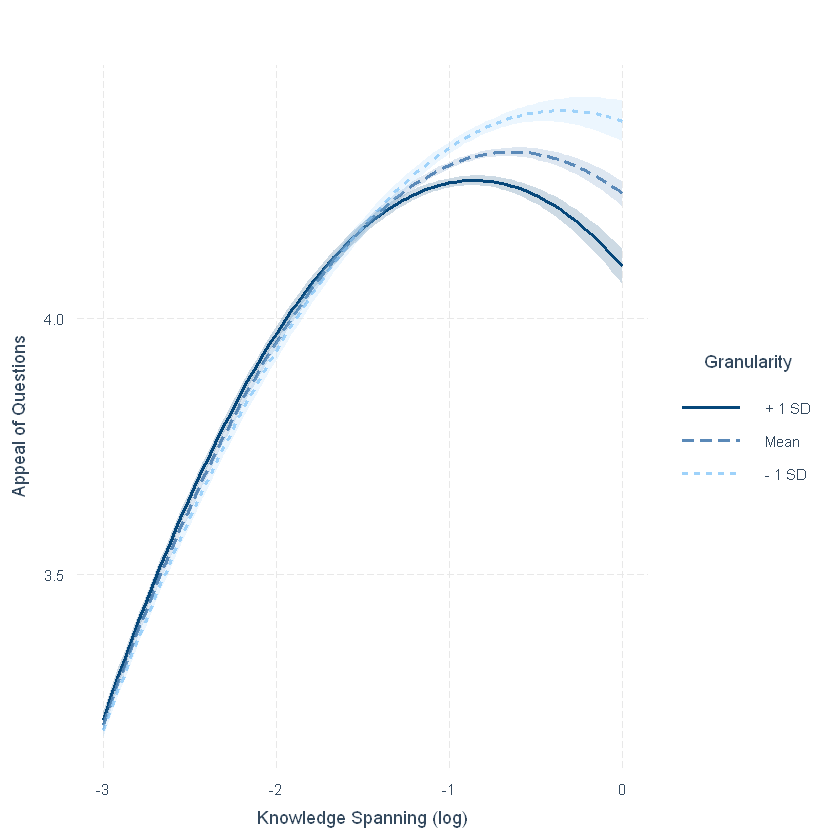

In [40]:
p<-interact_plot(model3, pred =log_content_distance, modx = knowledge_granularity, 
                 data = data, interval = TRUE,int.width = 0.8,
                x.label = TeX("Knowledge Spanning (log)"), y.label = TeX("Appeal of Questions"),
                 main.title = "",  legend.main = TeX("Granularity"),)
#p+xlim(0,1)+ylim(-1000,4000)

p


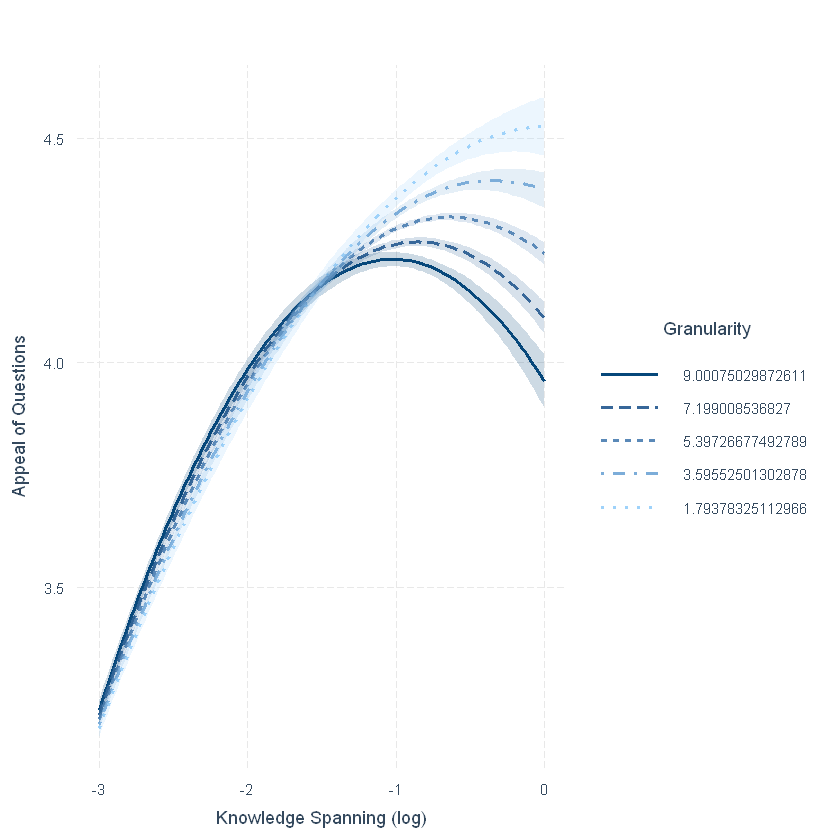

In [41]:
p<-interact_plot(model3, pred =log_content_distance, modx = knowledge_granularity, 
                  modx.values = c(mean(data$knowledge_granularity)-2*sd(data$knowledge_granularity),  
                                  mean(data$knowledge_granularity)-sd(data$knowledge_granularity),
                                    mean(data$knowledge_granularity),
                                    mean(data$knowledge_granularity)+sd(data$knowledge_granularity),
                                    mean(data$knowledge_granularity)+2*sd(data$knowledge_granularity)),
                 data = data, interval = TRUE,int.width = 0.8,
                x.label = TeX("Knowledge Spanning (log)"), y.label = TeX("Appeal of Questions"),
                 main.title = "",  legend.main = TeX("Granularity"),)
#p+xlim(0,1)+ylim(-1000,4000)

p


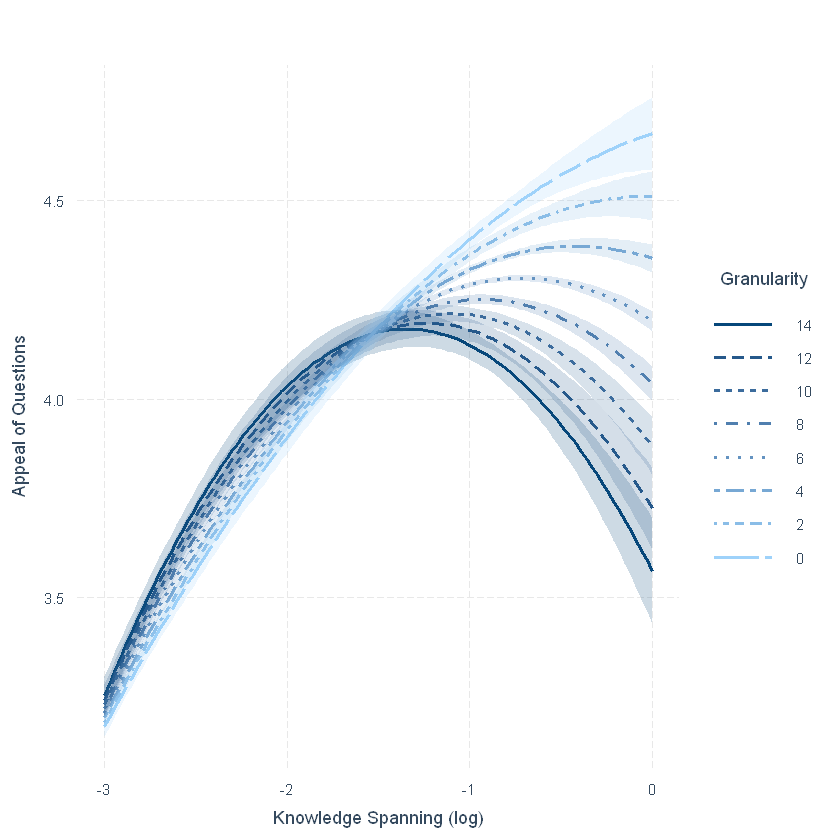

In [39]:
p<-interact_plot(model3, pred =log_content_distance, modx = knowledge_granularity, 
                  modx.values = c(0, 2, 4, 6, 8, 10, 12, 14),
                 data = data, interval = TRUE,int.width = 0.8,
                x.label = TeX("Knowledge Spanning (log)"), y.label = TeX("Appeal of Questions"),
                 main.title = "",  legend.main = TeX("Granularity"),)
#p+xlim(0,1)+ylim(-1000,4000)

p


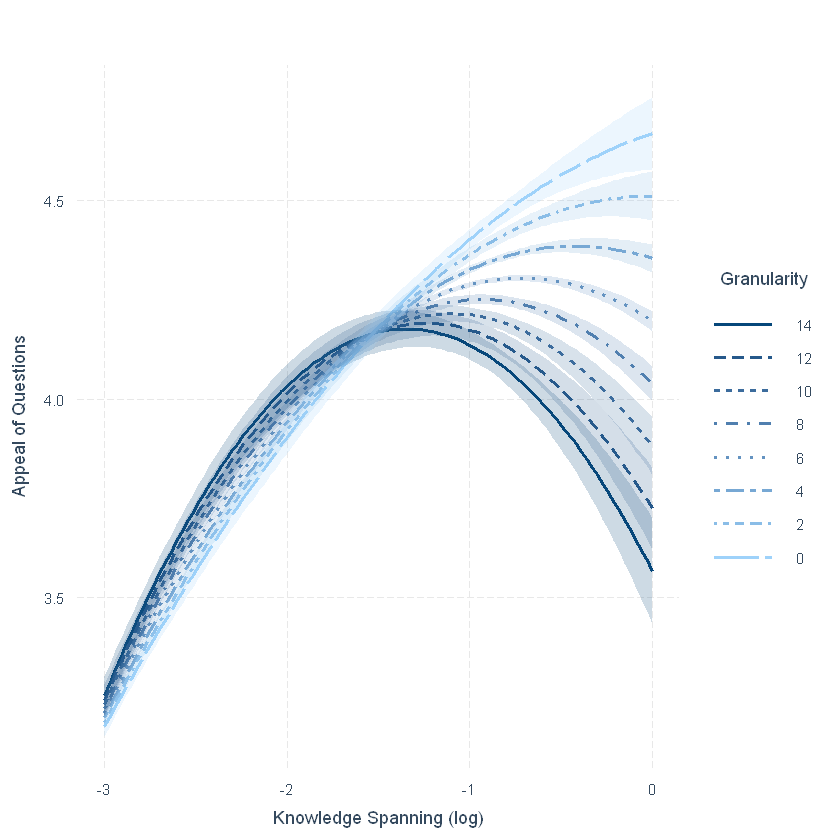

In [42]:
p<-interact_plot(model3, pred =log_content_distance, modx = knowledge_granularity, 
                  modx.values = c(0, 2, 4, 6, 8, 10, 12, 14),
                 data = data, interval = TRUE,int.width = 0.8,
                x.label = TeX("Knowledge Spanning (log)"), y.label = TeX("Appeal of Questions"),
                 main.title = "",  legend.main = TeX("Granularity"),)
#p+xlim(0,1)+ylim(-1000,4000)

p


In [147]:
# save figures as pdf
pdf(file="interaction_all_latex.pdf", width = 5, height = 5)
p
dev.off()

pdf 
  2

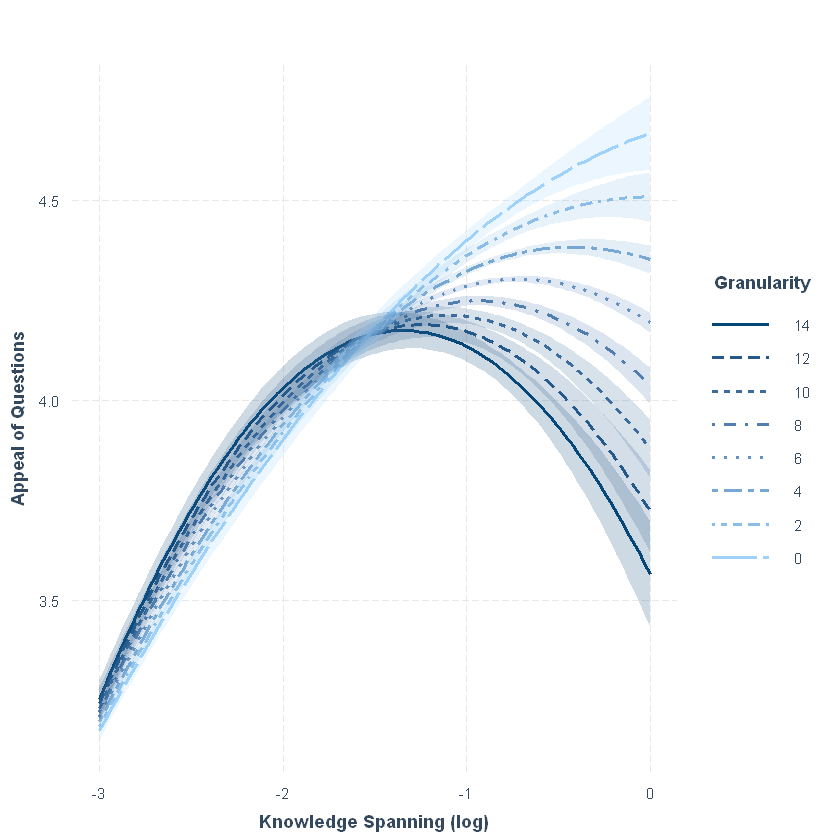

In [43]:
p<-interact_plot(model3, pred =log_content_distance, modx = knowledge_granularity, 
                  modx.values = c(0, 2, 4, 6, 8, 10, 12, 14),
                 data = data, interval = TRUE,int.width = 0.8,
                x.label = "Knowledge Spanning (log)", y.label = "Appeal of Questions",
                 main.title = "",  legend.main = "Granularity",)
#p+xlim(0,1)+ylim(-1000,4000)

p


In [51]:
pdf(file="interaction_all2.pdf", width = 5, height = 5)
#p+xlim(0,1)+ylim(-1000,4000)
p
dev.off()

pdf 
  2

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.



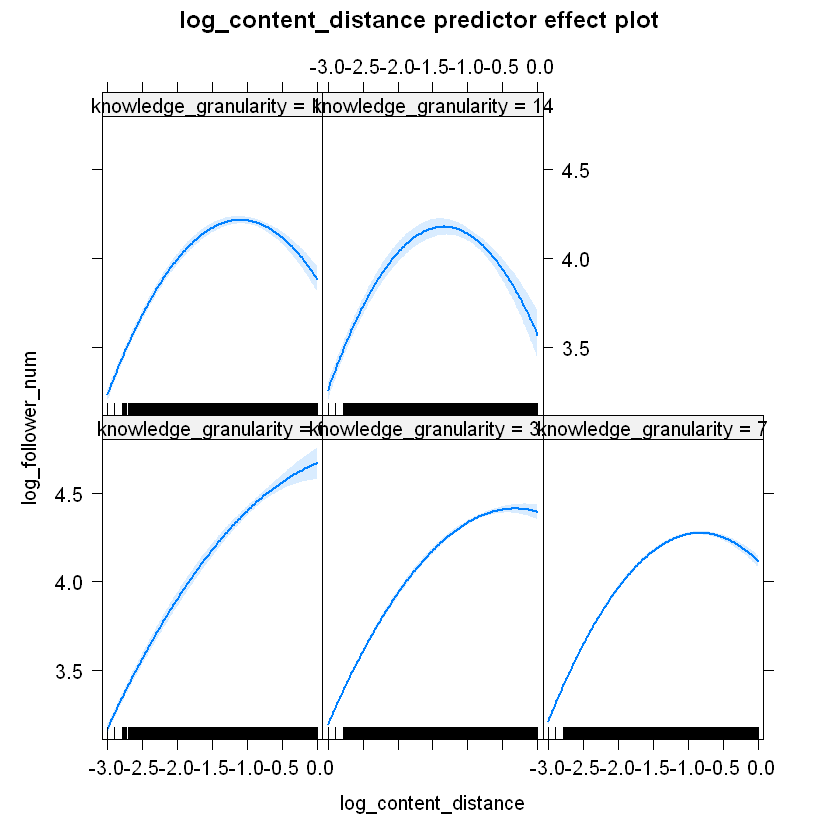

In [44]:
library('effects')
e1.lm1 <- predictorEffect("log_content_distance", model3, xlevels=5)
plot(e1.lm1)
